# This notebook is final modeling for the Honk4Honda data challenge
# Unsupervised Learning using K-means

## Import transformed feature matrix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ft = pd.read_csv('./data/final_features.csv', index_col=0)
ft.head()

,price,year,odometer,weather,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",14732.12,2004.48,121140.24,67.0,0.01,0.24,0.01,0.05,0.26,0.06,...,0.01,0.02,0.05,0.01,0.0,0.08,0.06,0.39,0.19,0.00
"akroncanton, OH",47837.46,2005.14,114005.80,49.0,0.02,0.17,0.03,0.05,0.21,0.04,...,0.01,0.02,0.05,0.00,0.0,0.08,0.09,0.42,0.11,0.01
"albany, MA",11397.68,2006.42,95270.76,50.0,0.00,0.15,0.02,0.06,0.35,0.04,...,0.00,0.04,0.09,0.00,0.0,0.03,0.10,0.21,0.15,0.02
"albany, NY",75564.48,2003.76,115786.44,53.0,0.04,0.16,0.02,0.04,0.15,0.04,...,0.01,0.05,0.08,0.00,0.0,0.07,0.08,0.38,0.10,0.01
"albany, VT",10361.04,1998.26,109755.61,44.0,0.04,0.12,0.01,0.05,0.23,0.04,...,0.04,0.04,0.06,0.01,0.0,0.08,0.09,0.32,0.12,0.01


## First time doing K-means, looking up some examples

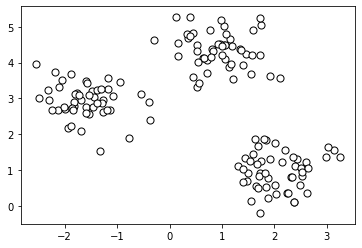

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [8]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

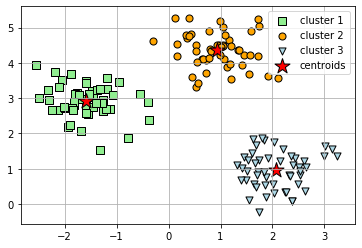

In [12]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)`
plt.grid()
plt.show()

# X is basically ft and indexes are the cities for which I want to see the cluster membership

# Let's do some clustering!

In [2]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=2, random_state=0)

In [18]:
y_km = km.fit_predict(ft)

In [19]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
ft[y_km == 1]

,price,year,odometer,weather,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
location,,,,,,,,,,,,,,,,,,,,,
"albuquerque, TX",11560575.44,2003.01,98107.10,67.0,0.02,0.10,0.00,0.02,0.28,0.10,...,0.01,0.01,0.03,0.01,0.00,0.04,0.07,0.60,0.16,0.00
"juneau, AK",10747522.14,2005.59,99940.10,29.0,0.01,0.11,0.02,0.07,0.25,0.03,...,0.01,0.06,0.09,0.00,0.01,0.10,0.11,0.24,0.10,0.00
"neworleans, MS",7205552.38,2003.76,129413.82,61.0,0.04,0.19,0.00,0.03,0.26,0.03,...,0.03,0.01,0.05,0.00,0.00,0.05,0.06,0.47,0.13,0.02
"westmd, PA",6510036.67,2004.52,118439.14,53.0,0.01,0.14,0.01,0.02,0.26,0.05,...,0.02,0.03,0.06,0.01,0.00,0.11,0.08,0.31,0.13,0.01


In [35]:
dir(km)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [39]:
km.score(ft.drop(['cluster'], axis=1))

-94855661779610.34

In [43]:
km.cluster_centers_

array([[8.54438256e+04, 2.00515128e+03, 1.12463685e+05, 5.31095700e+01,
        2.39528433e-02, 1.81567268e-01, 1.80998613e-02, 4.73925104e-02,
        2.06255201e-01, 5.04299584e-02, 4.69902913e-02, 1.74618585e-02,
        5.02635229e-02, 1.63938974e-02, 4.45492372e-02, 1.46310680e-01,
        4.77669903e-02, 1.76421637e-02, 6.57697642e-02, 2.02773925e-02,
        2.55214979e-01, 3.99445215e-02, 2.10443828e-01, 6.01941748e-02,
        3.23162275e-03, 2.05270458e-03, 4.27018031e-01, 2.39944521e-03,
        1.80305132e-04, 1.38696255e-04, 1.45991678e-01, 4.72954230e-03,
        6.09181692e-01, 2.05894591e-01, 2.95561720e-02, 9.26907074e-02,
        2.49653259e-04, 8.72482663e-01, 4.86823856e-03, 2.92371706e-02,
        9.34077670e-01, 1.40360610e-02, 5.78363384e-03, 1.44244105e-03,
        2.76144244e-02, 1.51872399e-02, 8.72981969e-01, 1.09750347e-01,
        1.68932039e-02, 3.04341193e-01, 1.89167822e-01, 1.38515950e-01,
        3.67808599e-01, 4.50346741e-02, 1.97961165e-01, 8.711511

In [24]:
ft['cluster'] = km.labels_
ft.head()

,price,year,odometer,weather,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,cluster
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",14732.12,2004.48,121140.24,67.0,0.01,0.24,0.01,0.05,0.26,0.06,...,0.02,0.05,0.01,0.0,0.08,0.06,0.39,0.19,0.00,0
"akroncanton, OH",47837.46,2005.14,114005.80,49.0,0.02,0.17,0.03,0.05,0.21,0.04,...,0.02,0.05,0.00,0.0,0.08,0.09,0.42,0.11,0.01,0
"albany, MA",11397.68,2006.42,95270.76,50.0,0.00,0.15,0.02,0.06,0.35,0.04,...,0.04,0.09,0.00,0.0,0.03,0.10,0.21,0.15,0.02,0
"albany, NY",75564.48,2003.76,115786.44,53.0,0.04,0.16,0.02,0.04,0.15,0.04,...,0.05,0.08,0.00,0.0,0.07,0.08,0.38,0.10,0.01,0
"albany, VT",10361.04,1998.26,109755.61,44.0,0.04,0.12,0.01,0.05,0.23,0.04,...,0.04,0.06,0.01,0.0,0.08,0.09,0.32,0.12,0.01,0


In [31]:
ft.loc['omaha, NE','cluster']

0

In [32]:
ft.loc[ft['cluster']==ft.loc['omaha, NE','cluster']]

,price,year,odometer,weather,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,cluster
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",14732.12,2004.48,121140.24,67.0,0.01,0.24,0.01,0.05,0.26,0.06,...,0.02,0.05,0.01,0.0,0.08,0.06,0.39,0.19,0.00,0
"akroncanton, OH",47837.46,2005.14,114005.80,49.0,0.02,0.17,0.03,0.05,0.21,0.04,...,0.02,0.05,0.00,0.0,0.08,0.09,0.42,0.11,0.01,0
"albany, MA",11397.68,2006.42,95270.76,50.0,0.00,0.15,0.02,0.06,0.35,0.04,...,0.04,0.09,0.00,0.0,0.03,0.10,0.21,0.15,0.02,0
"albany, NY",75564.48,2003.76,115786.44,53.0,0.04,0.16,0.02,0.04,0.15,0.04,...,0.05,0.08,0.00,0.0,0.07,0.08,0.38,0.10,0.01,0
"albany, VT",10361.04,1998.26,109755.61,44.0,0.04,0.12,0.01,0.05,0.23,0.04,...,0.04,0.06,0.01,0.0,0.08,0.09,0.32,0.12,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"youngstown, PA",6650.55,2000.36,117958.11,53.0,0.01,0.25,0.02,0.08,0.20,0.04,...,0.05,0.03,0.01,0.0,0.09,0.07,0.48,0.09,0.01,0
"yubasutter, CA",37907.48,2006.99,116101.87,59.0,0.01,0.14,0.03,0.07,0.16,0.05,...,0.01,0.04,0.00,0.0,0.03,0.05,0.65,0.10,0.00,0
"yuma, AZ",8246.79,2002.27,114340.74,71.0,0.03,0.17,0.03,0.04,0.20,0.03,...,0.02,0.07,0.01,0.0,0.06,0.09,0.38,0.16,0.01,0


# Choose number of clusters by elbow method

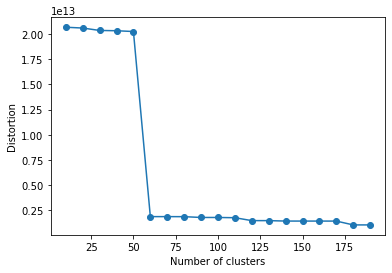

In [48]:
# calculate distortion for a range of number of cluster
irange = list(range(10,200,10))
distortions = []
for i in irange:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(ft)
    distortions.append(km.inertia_)

# plot
plt.plot(irange, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Interesting elbow, I think the issue is with scaling

In [50]:
ft=ft.drop(['cluster'],axis=1)
ft.head()

,price,year,odometer,weather,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",14732.12,2004.48,121140.24,67.0,0.01,0.24,0.01,0.05,0.26,0.06,...,0.01,0.02,0.05,0.01,0.0,0.08,0.06,0.39,0.19,0.00
"akroncanton, OH",47837.46,2005.14,114005.80,49.0,0.02,0.17,0.03,0.05,0.21,0.04,...,0.01,0.02,0.05,0.00,0.0,0.08,0.09,0.42,0.11,0.01
"albany, MA",11397.68,2006.42,95270.76,50.0,0.00,0.15,0.02,0.06,0.35,0.04,...,0.00,0.04,0.09,0.00,0.0,0.03,0.10,0.21,0.15,0.02
"albany, NY",75564.48,2003.76,115786.44,53.0,0.04,0.16,0.02,0.04,0.15,0.04,...,0.01,0.05,0.08,0.00,0.0,0.07,0.08,0.38,0.10,0.01
"albany, VT",10361.04,1998.26,109755.61,44.0,0.04,0.12,0.01,0.05,0.23,0.04,...,0.04,0.04,0.06,0.01,0.0,0.08,0.09,0.32,0.12,0.01


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Price')]

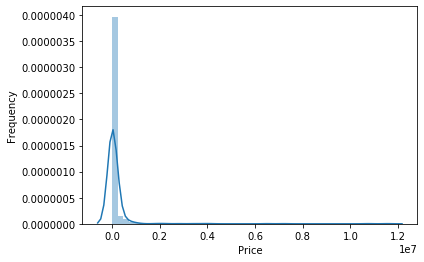

In [51]:
ax = sns.distplot(ft['price'])
ax.set(xlabel='Price', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Year')]

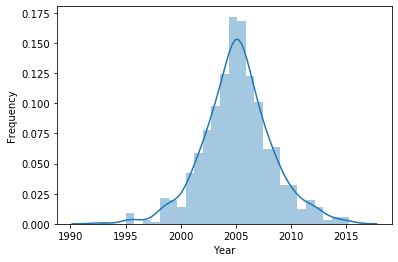

In [52]:
ax = sns.distplot(ft['year'])
ax.set(xlabel='Year', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Avg Odometer')]

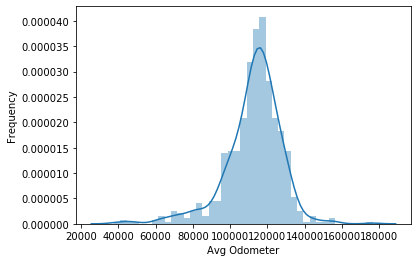

In [53]:
ax = sns.distplot(ft['odometer'])
ax.set(xlabel='Avg Odometer', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Avg Temp')]

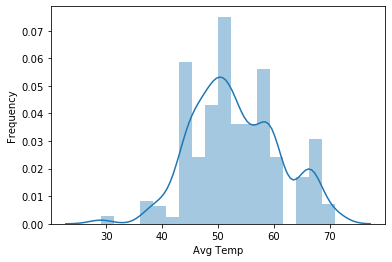

In [54]:
ax = sns.distplot(ft['weather'])
ax.set(xlabel='Avg Temp', ylabel='Frequency')

# I can scale year odometer and weather by standard scaler

In [3]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [4]:
scaler = StandardScaler()
ss_cols=['year','odometer','weather']
scaled_df = scaler.fit_transform(ft[ss_cols])
scaled_df = pd.DataFrame(scaled_df, columns=ss_cols)
scaled_df.index = ft.index
rest = ft.drop(ss_cols, axis=1)
ft_scaled = pd.concat([rest, scaled_df], axis=1)
ft_scaled.head()

,price,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,...,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,year,odometer,weather
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",14732.12,0.01,0.24,0.01,0.05,0.26,0.06,0.03,0.01,0.04,...,0.01,0.0,0.08,0.06,0.39,0.19,0.00,-0.214089,0.568855,1.783079
"akroncanton, OH",47837.46,0.02,0.17,0.03,0.05,0.21,0.04,0.05,0.03,0.05,...,0.00,0.0,0.08,0.09,0.42,0.11,0.01,-0.001973,0.101399,-0.526976
"albany, MA",11397.68,0.00,0.15,0.02,0.06,0.35,0.04,0.04,0.00,0.05,...,0.00,0.0,0.03,0.10,0.21,0.15,0.02,0.409405,-1.126143,-0.398639
"albany, NY",75564.48,0.04,0.16,0.02,0.04,0.15,0.04,0.08,0.03,0.06,...,0.00,0.0,0.07,0.08,0.38,0.10,0.01,-0.445490,0.218068,-0.013630
"albany, VT",10361.04,0.04,0.12,0.01,0.05,0.23,0.04,0.04,0.00,0.07,...,0.01,0.0,0.08,0.09,0.32,0.12,0.01,-2.213129,-0.177079,-1.168658


# Price not normally distributed, use robust scaler

In [5]:
scaler = RobustScaler()
rs_cols=['price']
scaled_df = scaler.fit_transform(ft_scaled[rs_cols])
scaled_df = pd.DataFrame(scaled_df, columns=rs_cols)
scaled_df.index = ft_scaled.index
rest = ft_scaled.drop(rs_cols, axis=1)
ft_scaled = pd.concat([rest, scaled_df], axis=1)
ft_scaled.head()

,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_mercedes-benz,...,paint_color_purple,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,year,odometer,weather,price
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",0.01,0.24,0.01,0.05,0.26,0.06,0.03,0.01,0.04,0.01,...,0.0,0.08,0.06,0.39,0.19,0.00,-0.214089,0.568855,1.783079,0.069607
"akroncanton, OH",0.02,0.17,0.03,0.05,0.21,0.04,0.05,0.03,0.05,0.02,...,0.0,0.08,0.09,0.42,0.11,0.01,-0.001973,0.101399,-0.526976,2.373372
"albany, MA",0.00,0.15,0.02,0.06,0.35,0.04,0.04,0.00,0.05,0.02,...,0.0,0.03,0.10,0.21,0.15,0.02,0.409405,-1.126143,-0.398639,-0.162433
"albany, NY",0.04,0.16,0.02,0.04,0.15,0.04,0.08,0.03,0.06,0.02,...,0.0,0.07,0.08,0.38,0.10,0.01,-0.445490,0.218068,-0.013630,4.302866
"albany, VT",0.04,0.12,0.01,0.05,0.23,0.04,0.04,0.00,0.07,0.04,...,0.0,0.08,0.09,0.32,0.12,0.01,-2.213129,-0.177079,-1.168658,-0.234572


# Back to KMeans

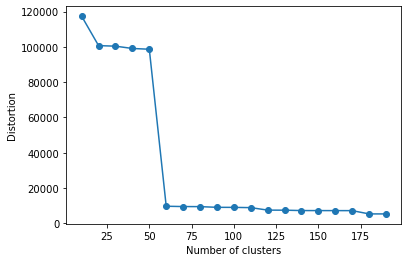

In [6]:
# calculate distortion for a range of number of cluster
irange = list(range(10,200,10))
distortions = []
for i in irange:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(ft_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(irange, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Still the weird plot but better distortion. Let's narrow in to the steep drop

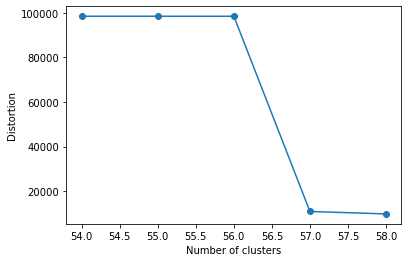

In [7]:
# calculate distortion for a smaller range of number of cluster
irange = list(range(54,59))
distortions = []
for i in irange:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(ft_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(irange, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## 57 optimal I guess

In [8]:
km = KMeans(n_clusters=57, random_state=0)

km.fit(ft_scaled)
ft_scaled['cluster'] = km.labels_
ft_scaled.head()

,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_mercedes-benz,...,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,year,odometer,weather,price,cluster
location,,,,,,,,,,,,,,,,,,,,,
"abilene, TX",0.01,0.24,0.01,0.05,0.26,0.06,0.03,0.01,0.04,0.01,...,0.08,0.06,0.39,0.19,0.00,-0.214089,0.568855,1.783079,0.069607,34
"akroncanton, OH",0.02,0.17,0.03,0.05,0.21,0.04,0.05,0.03,0.05,0.02,...,0.08,0.09,0.42,0.11,0.01,-0.001973,0.101399,-0.526976,2.373372,56
"albany, MA",0.00,0.15,0.02,0.06,0.35,0.04,0.04,0.00,0.05,0.02,...,0.03,0.10,0.21,0.15,0.02,0.409405,-1.126143,-0.398639,-0.162433,39
"albany, NY",0.04,0.16,0.02,0.04,0.15,0.04,0.08,0.03,0.06,0.02,...,0.07,0.08,0.38,0.10,0.01,-0.445490,0.218068,-0.013630,4.302866,15
"albany, VT",0.04,0.12,0.01,0.05,0.23,0.04,0.04,0.00,0.07,0.04,...,0.08,0.09,0.32,0.12,0.01,-2.213129,-0.177079,-1.168658,-0.234572,16


In [9]:
ft_scaled.loc['omaha, NE','cluster']

0

In [10]:
ft_scaled.loc[ft_scaled['cluster']==ft_scaled.loc['omaha, NE','cluster']]

,manufacturer_bmw,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_mercedes-benz,...,paint_color_red,paint_color_silver,paint_color_unknown,paint_color_white,paint_color_yellow,year,odometer,weather,price,cluster
location,,,,,,,,,,,,,,,,,,,,,
"bemidji, ND",0.00,0.35,0.07,0.04,0.15,0.05,0.02,0.00,0.09,0.00,...,0.10,0.21,0.06,0.25,0.01,2.035634,-0.850159,-1.938676,0.144998,0
"billings, WY",0.00,0.18,0.01,0.04,0.19,0.16,0.00,0.00,0.08,0.00,...,0.07,0.09,0.32,0.22,0.01,0.264780,-0.730509,-1.553667,0.516813,0
"bismarck, ND",0.02,0.28,0.03,0.04,0.20,0.03,0.05,0.02,0.06,0.00,...,0.09,0.12,0.26,0.20,0.00,0.833639,-0.741037,-1.938676,-0.084443,0
"cosprings, CO",0.03,0.11,0.02,0.05,0.15,0.04,0.05,0.02,0.08,0.02,...,0.07,0.11,0.27,0.15,0.01,0.746864,-0.862125,-1.040321,0.065201,0
"dubuque, IA",0.03,0.24,0.03,0.04,0.23,0.05,0.02,0.02,0.03,0.01,...,0.10,0.12,0.28,0.15,0.00,0.984692,-0.710834,-0.783649,-0.079696,0
"eauclaire, MN",0.01,0.19,0.01,0.04,0.45,0.03,0.04,0.00,0.03,0.00,...,0.11,0.08,0.18,0.17,0.01,1.045756,-1.303423,-1.296994,0.209989,0
"fortcollins, CO",0.02,0.11,0.02,0.05,0.18,0.04,0.04,0.02,0.09,0.02,...,0.07,0.10,0.29,0.16,0.01,0.605453,-0.444960,-1.040321,0.053574,0
"glensfalls, NH",0.00,0.33,0.00,0.00,0.36,0.16,0.00,0.00,0.00,0.02,...,0.11,0.01,0.16,0.47,0.00,1.820303,-1.057120,-1.296994,1.233039,0
"greatfalls, MT",0.01,0.19,0.02,0.05,0.24,0.10,0.03,0.02,0.06,0.00,...,0.11,0.11,0.26,0.17,0.01,0.348341,-0.660461,-1.682003,0.177871,0


# 25 other states in this cluster where Honda could consider expanding

In [11]:
export = (ft_scaled.loc[ft_scaled['cluster']==ft_scaled.loc['omaha, NE','cluster']]).to_csv('./data/honda_expansion_cluster.csv', header=True, index = True)

In [12]:
export = ft_scaled.to_csv('./data/all_clusters.csv', header=True, index = True)

In [13]:
ft_scaled['cluster'].value_counts()

31    66
40    59
48    57
21    52
19    51
34    33
39    32
50    31
0     28
12    27
16    27
22    23
53    21
56    20
36    16
43    13
15    13
41    13
49    11
17    11
38     9
52     9
7      8
33     8
51     8
26     7
44     7
8      7
18     7
28     5
42     4
37     4
32     4
46     3
35     3
54     3
25     3
45     2
13     2
30     1
29     1
1      1
2      1
3      1
4      1
5      1
6      1
24     1
23     1
9      1
10     1
11     1
47     1
55     1
14     1
20     1
27     1
Name: cluster, dtype: int64